# 

Project 1
## How important are academic achievements for later success?

### 1. Understanding the solution

#### Problem Statement
Many people believe that good grades, attending a top university or winning awards are important for becoming successful in life.
In this project, I want to find out if academic achievements are really so important for career success.


#### Inputs: What data do I use
I use the dataset [Educational Backgrounds of Successful People](https://www.kaggle.com/datasets/adilshamim8/educational-backgrounds-of-successful-people) from kaggle.


Important columns are:
- GPA
- Degree
- University Global Ranking
- Institution

#### Outputs: What do I want to find out?
 I want to answer these questions:
 - Do people with high GPAs become more successful?
 - What kind of degree is most common among successful individuals?
 - Are people who attend top-ranked universities more likely to become successful? 

#### Constraints: What could make this difficult?
- Success is hard to measure exactly 
- different countries may have different grading systems or university rankings
- some data might be missing or unclear
- this dataset provides only 108 rows
- dataset contains a bias because only successfull people are included in it

### 2. Designing the solution

#### How can I solve the problem?
I will solve this by analyzing the dataset in a step-by-step way:

1. Load the dataset: Read the CSV file into a DataFrame using Pandas
2. Explore and clean the data: Check for missing or inconsistent data
3. Understand the key features: Focus on columns like GPA, University Global Ranking, Degree, Institution
4. Analyze the data
5. Visualize the results: Create plots to support the results (bar charts)
6. Summarize the results

### 3. Implementing the solution

Downloading the dataset:

In [192]:
import kagglehub


# Download latest version
path = kagglehub.dataset_download("adilshamim8/educational-backgrounds-of-successful-people")

print("Path to dataset files:", path)

Path to dataset files: /home/u0/.cache/kagglehub/datasets/adilshamim8/educational-backgrounds-of-successful-people/versions/1


In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Reading my dataset using pandas:

In [194]:
df = pd.read_csv("./data/successful_educations.csv")

Explore the data:

In [195]:
df.head()

,Name,Profession,Degree,Field,Institution,Graduation Year,Country,University Global Ranking,GPA (or Equivalent),Scholarship/Award
0,Elon Musk,Entrepreneur,Bachelor of Science,Physics & Economics,University of Pennsylvania,1997.0,USA,13,3.7,Dean’s List
1,Bill Gates,Entrepreneur,Dropped Out,computer science,Harvard University,1975.0,USA,5,NaN,Dean’s List
2,Sundar Pichai,Tech Executive,Master of Science,Material Sciences and Engineering,Stanford University,1995.0,USA,3,3.8,Fellowship in Engineering
3,Sheryl Sandberg,Tech Executive,Master of Business Administration,Business Administration,Harvard Business School,1995.0,USA,2,3.9,Hoover Fellowship
4,Jeff Bezos,Entrepreneur,Bachelor of Science,Computer Science and Electrical Engineering,Princeton University,1986.0,USA,16,3.6,Marquis Scholar


#### 1. Question: Do people with high GPAs become more successful?

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       108 non-null    object 
 1   Profession                 108 non-null    object 
 2   Degree                     106 non-null    object 
 3   Field                      105 non-null    object 
 4   Institution                106 non-null    object 
 5   Graduation Year            99 non-null     float64
 6   Country                    108 non-null    object 
 7   University Global Ranking  73 non-null     object 
 8   GPA (or Equivalent)        93 non-null     object 
 9   Scholarship/Award          80 non-null     object 
dtypes: float64(1), object(9)
memory usage: 8.6+ KB


As you can see the coulumns Degree, Field, Institution, Graduation Year, University Global Ranking, GPA, Scholarship/Award have missing values. In my analyse I want to focus on the columns Degree, GPA, Institution, University Global Ranking. In Degree there are 2 values missing, in GPA are 15 values missing, in Institution are 2 values missing and in University Global Ranking are 35 values missing.

In [197]:
df["Degree"].unique()

array(['Bachelor of Science', 'Dropped Out', 'Master of Science',
       'Master of Business Administration', 'Honorary Doctorate',
       'Undergraduate Studies', 'Doctor of Philosophy', 'Juris Doctor',
       'Master of Arts', 'Bachelor of Arts', 'High School', 'PhD',
       'Bachelor', nan, 'Master', 'MBA', 'Master/MBA', 'MD', 'Dropout',
       'Engineering', 'No Degree'], dtype=object)

`Dropped Out` and `Dropout` are the same so they should have the same label.

In [198]:
df["Degree"] = df["Degree"].replace("Dropped Out", "Dropout")

In [199]:
gpa_null = df[df["GPA (or Equivalent)"].isnull()]
gpa_null["Degree"]

1                  Dropout
6       Honorary Doctorate
9                  Dropout
10    Doctor of Philosophy
16    Doctor of Philosophy
19             High School
23                     NaN
29             High School
52                     NaN
59                 Dropout
60                 Dropout
68                 Dropout
77                 Dropout
80                 Dropout
93               No Degree
Name: Degree, dtype: object

As you can see, 8 out of 15 GPA values are missing because theses indiviuals either dropped out of university or did not complete a degree (1 person has no degree at all).
To ensure clean data, I will remove the other 7 records with missing GPA values.

In [200]:
gpa_null_not_dropout_filter = df["GPA (or Equivalent)"].isnull() & (~df["Degree"].isin(["Dropout", "No Degree"]))
gpa_null_not_dropout_filter

df = df[~gpa_null_not_dropout_filter]
df

,Name,Profession,Degree,Field,Institution,Graduation Year,Country,University Global Ranking,GPA (or Equivalent),Scholarship/Award
0,Elon Musk,Entrepreneur,Bachelor of Science,Physics & Economics,University of Pennsylvania,1997.0,USA,13,3.7,Dean’s List
1,Bill Gates,Entrepreneur,Dropout,computer science,Harvard University,1975.0,USA,5,NaN,Dean’s List
2,Sundar Pichai,Tech Executive,Master of Science,Material Sciences and Engineering,Stanford University,1995.0,USA,3,3.8,Fellowship in Engineering
3,Sheryl Sandberg,Tech Executive,Master of Business Administration,Business Administration,Harvard Business School,1995.0,USA,2,3.9,Hoover Fellowship
4,Jeff Bezos,Entrepreneur,Bachelor of Science,Computer Science and Electrical Engineering,Princeton University,1986.0,USA,16,3.6,Marquis Scholar
...,...,...,...,...,...,...,...,...,...,...
103,Eduardo Saverin,Entrepreneur,Bachelor,Economics,Harvard University,2006.0,USA,3,3.7,NaN
104,Vagit Alekperov,Business,Bachelor,Engineering,Azarbayjan State Oil Academy,1975.0,Azerbaijan,NaN,3.6,NaN
105,Stefan Quandt,Business,Bachelor,Engineering,Technical University of Darmstadt,1994.0,Germany,NaN,3.7,NaN
106,Susanne Klatten,Business,Bachelor,Economics,Technical University of Munich,1993.0,Germany,NaN,3.8,NaN


Feature selecetion

In [201]:
selected_features = df[["GPA (or Equivalent)", "Degree", "University Global Ranking"]]
selected_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 107
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   GPA (or Equivalent)        93 non-null     object
 1   Degree                     101 non-null    object
 2   University Global Ranking  71 non-null     object
dtypes: object(3)
memory usage: 3.2+ KB


In [202]:
selected_features["GPA (or Equivalent)"].unique()

array(['3.7', nan, '3.8', '3.9', '3.6', '3.5', 'First Class Honours',
       '3.1', '02:02:00', 'Honor Society', 'Magna Cum Laude', '4.0',
       'Summa Cum Laude', 'First Class'], dtype=object)

As you can see the GPA value has non numerical entries. For further analysis I  have to remove these.

The GPA is stored as a string data type. To work with it, I first need to convert it to a float.

In [203]:
selected_features["GPA (or Equivalent)"] = pd.to_numeric(selected_features["GPA (or Equivalent)"], errors='coerce')
selected_features


/tmp/ipykernel_6469/1001701899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features["GPA (or Equivalent)"] = pd.to_numeric(selected_features["GPA (or Equivalent)"], errors='coerce')


,GPA (or Equivalent),Degree,University Global Ranking
0,3.7,Bachelor of Science,13
1,NaN,Dropout,5
2,3.8,Master of Science,3
3,3.9,Master of Business Administration,2
4,3.6,Bachelor of Science,16
...,...,...,...
103,3.7,Bachelor,3
104,3.6,Bachelor,NaN
105,3.7,Bachelor,NaN
106,3.8,Bachelor,NaN


I calculate in percent the GPA average.

In [204]:
average_gpa = selected_features["GPA (or Equivalent)"].mean()
average_gpa

np.float64(3.7717647058823527)

Then I also calculate how many percent do not have a degree.

In [205]:
no_degree_or_dropout_count = df["Degree"].isin(["No Degree", "Dropout"]).sum()
total_people = len(df)
percent_no_degree_or_dropout = (no_degree_or_dropout_count / total_people) 
percent_no_degree_or_dropout

np.float64(0.07920792079207921)

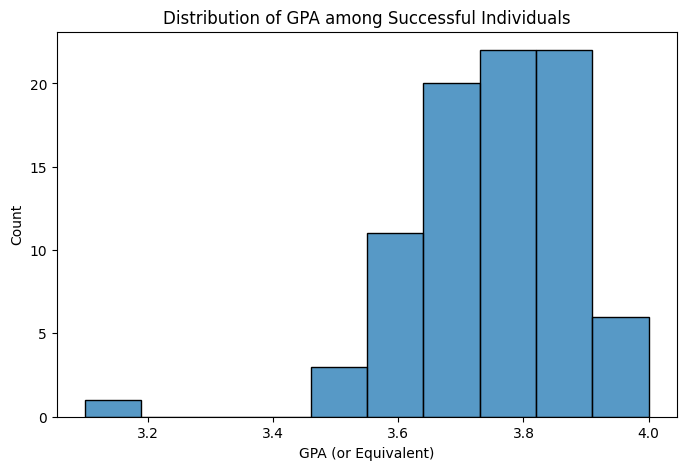

In [206]:
plt.figure(figsize=(8, 5))
sns.histplot(selected_features["GPA (or Equivalent)"].dropna(), bins=10, kde=False)
plt.xlabel("GPA (or Equivalent)")
plt.ylabel("Count")
plt.title("Distribution of GPA among Successful Individuals")
plt.show()

#### First conclusion
The average GPA for university students in the U.S. is approximately 3.1. In contrast, the average GPA of the successful individuals in my dataset is around 3.8. This suggests that a high GPA can play an important role in achieving career success.
However, there is still 7.9%  who achieved success without completing a university degree, which shows that academic excellence, while helpful, is not a strict requirement for success.


#### 2. Question: What kind of academic thesis is most common among successful individuals?

First I took a look at the different types of academic degrees listed in the Degree coloumn. 

In [207]:
selected_features["Degree"].unique()

array(['Bachelor of Science', 'Dropout', 'Master of Science',
       'Master of Business Administration', 'Undergraduate Studies',
       'Juris Doctor', 'Master of Arts', 'Bachelor of Arts', 'PhD',
       'Bachelor', 'Master', 'MBA', 'Master/MBA', 'MD', 'Engineering',
       'No Degree'], dtype=object)

Since there are many variations, I grouped them into four main categories: Bachelor, Master, Doctor and No Degree.
This simplification makes the data easier to work with and the results more meaningful.

In [208]:
bachelor_labels = [
    "Bachelor of Science", "Undergraduate Studies", "Bachelor of Arts", "Bachelor", "Engineering"
]
selected_features["Degree"] = selected_features["Degree"].replace(bachelor_labels, "Bachelor")


master_labels = [
    "Master of Science", "Master of Business Administration", "Master of Arts", "MBA", "Master/MBA"
]
selected_features["Degree"] = selected_features["Degree"].replace(master_labels, "Master")

doctor_labels = ["Juris Doctor", "PhD", "MD", "Doctor of Philosophy"]
selected_features["Degree"] = selected_features["Degree"].replace(doctor_labels, "Doctor")


selected_features["Degree"] = selected_features["Degree"].replace(["Dropout", "No Degree"], "No Degree")

selected_features["Degree"].unique()

/tmp/ipykernel_6469/1657522224.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features["Degree"] = selected_features["Degree"].replace(bachelor_labels, "Bachelor")
/tmp/ipykernel_6469/1657522224.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features["Degree"] = selected_features["Degree"].replace(master_labels, "Master")
/tmp/ipykernel_6469/1657522224.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

array(['Bachelor', 'No Degree', 'Master', 'Doctor'], dtype=object)

Next, I calculated the percentage of successful individuals in each category.

In [209]:
selected_features["Degree"].value_counts() / len(selected_features)

Degree
Bachelor     0.495050
Master       0.306931
Doctor       0.118812
No Degree    0.079208
Name: count, dtype: float64

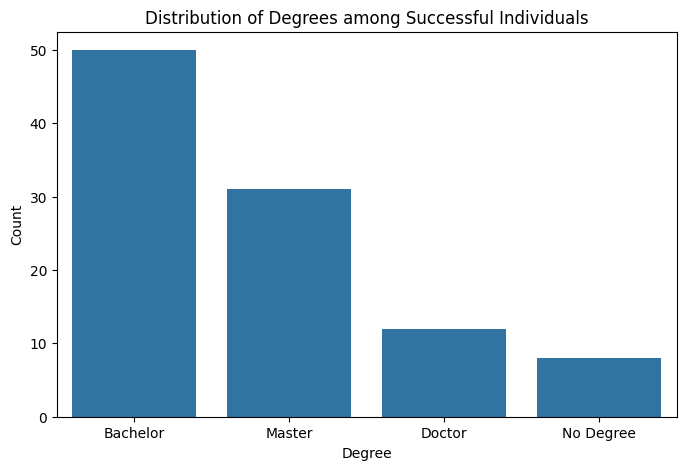

In [210]:
plt.figure(figsize=(8, 5))
sns.countplot(data=selected_features, x="Degree", order=selected_features["Degree"].value_counts().index)
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Distribution of Degrees among Successful Individuals")
plt.show()

#### Second Conclusion
In my dataset, 50% of the successful individuals hold a Bachelor degree, 31% have earned a Master and 12% hold a doctoral degree. Also 8% of them have no academic degree at all.
According to the [Census Bureau Educational Attainment Data](https://www.census.gov/newsroom/press-releases/2023/educational-attainment-data.html), in the U.S. (2022), 23% of the population aged 25 and older hold a Bachelor degree, 14% have earned a Master or Doctorial degree. The remaining 63% have no university degree at all.


Compared to the general U.S. population, successful individuals in my dataset are far more likely to hold a university degree - especially at the Master's and Doctoral level. This suggests that while a degree may not be strictly necessary for success, higher education is much more common among successful persons than in the general population.

#### 3. Are people who attend top-ranked universities more likely to become successful?

First, I examined the values in the `University Global Ranking` column and checked their data type. 

In [211]:
selected_features["University Global Ranking"].unique()

array(['13', '5', '3', '2', '16', '11', '301–350', '4', '26', '40', '14',
       '161', '62', nan, '7', '23', '58', '6', '122', '1', '28', '8',
       '12', '15', '10', '27', '43', '597', '60', '65', '89', '137', '35'],
      dtype=object)

Since they were stored as strings, I converted them to floats. I then replaced both missing values (NaN) and the range "301–350" with 500, as these rankings are not relevant for my analysis, which focuses on the top 20 universities. 

In [212]:
selected_features["University Global Ranking"] = selected_features["University Global Ranking"].replace(['301–350', np.nan], 500)
selected_features["University Global Ranking"] = selected_features["University Global Ranking"].astype(float)
selected_features["University Global Ranking"].unique()

/tmp/ipykernel_6469/3520234070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features["University Global Ranking"] = selected_features["University Global Ranking"].replace(['301–350', np.nan], 500)
/tmp/ipykernel_6469/3520234070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features["University Global Ranking"] = selected_features["University Global Ranking"].astype(float)


array([ 13.,   5.,   3.,   2.,  16.,  11., 500.,   4.,  26.,  40.,  14.,
       161.,  62.,   7.,  23.,  58.,   6., 122.,   1.,  28.,   8.,  12.,
        15.,  10.,  27.,  43., 597.,  60.,  65.,  89., 137.,  35.])

After cleaning the data, I calculated the percentage of successful individuals who attended a top 20 university.

In [213]:
ranking_between_1_20 = selected_features[
    (selected_features["University Global Ranking"] >= 1) &
    (selected_features["University Global Ranking"] <= 20)
]
percent_between_1_20 = len(ranking_between_1_20) / len(selected_features) * 100
print(f"Percentage of University Global Ranking between 1 and 20: {percent_between_1_20:.2f}%")

Percentage of University Global Ranking between 1 and 20: 48.51%


I also created a bar chart showing how many successful individuals attended each university — focusing only on the 10 most frequently attended ones.

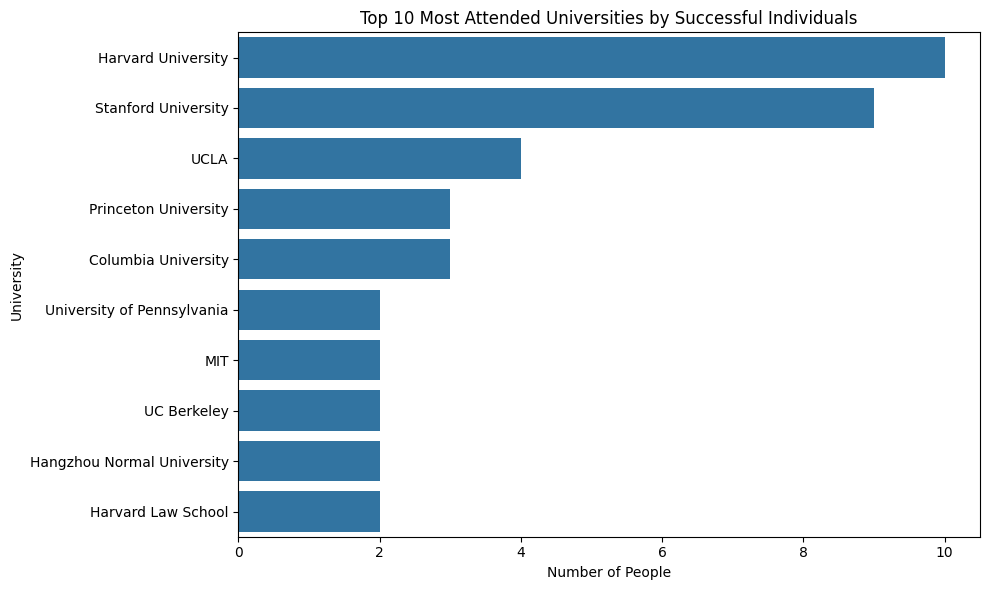

In [214]:
top_universities = df['Institution'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_universities.values, y=top_universities.index, orient='h')
plt.xlabel('Number of People')
plt.ylabel('University')
plt.title('Top 10 Most Attended Universities by Successful Individuals')
plt.tight_layout()
plt.show()

#### Third conclusion
 Among the successful individuals in my dataset, 48.5% attended one of the top 20 universities worldwide. 
 Considering the total number of students worldwide and the limited capacity of the top 20 universities, this percentage is quite significant.Therefore, it can be concluded that people who attended top-ranked universities are more likely to become successful. 
 The bar chart also shows which universities most of these individuals attended, and it is noticeable that all of these are well-known university names.

### Final conclusion
#### How important are academic achievements for later success?

Academic achievement appears to play an important role in achieving career success. Most individuals in the dataset hold university degrees and the average GPA is significantly above the U.S. average. Nearly half of them attended one of the top 20 universities worldwide, suggesting that elite institutions may offer an advantage on the path to success.

In conclusion, academic achievements — such as earning a degree, maintaining a strong GPA, and attending prestigious universities — are common among successful individuals and can certainly support a successful career. However, success can take many forms, and not everyone in the dataset followed the same path. Some achieved success without formal degrees.
 
 We also have to consider that success is hard to measure exactly, and grading systems or university rankings can vary between countries. Additionally, the dataset contains only 108 rows (after cleaning even less than 108), and it is biased because it includes only successful people.